In [1]:
import os
import warnings
import pprint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from matplotlib import gridspec
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
#from xgboost import XGBClassifier


from sklearn import tree

from os import system
from IPython.display import Image


warnings.filterwarnings('ignore')                                       # Ignore/Do not display warnings

main_data = pd.read_csv('skmeans.csv')

In [2]:
main_data.head()

,S.No,Protein,Fat,vitaminC,Fiber,Product
0,1,-0.749825,0.426892,0.287212,1.279936,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.230835,-0.304578,-0.881972,-0.387079,Bacon and beef sticks
2,3,-0.060478,0.451551,2.450659,1.729280,"Apples, frozen, unsweetened, unheated (Include..."
3,4,-0.330121,-0.508314,-1.008903,-0.848201,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,-1.259850,-0.560451,-1.255896,-0.548145,"Alcoholic beverage, daiquiri, canned"


In [3]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S.No      1746 non-null   int64  
 1   Protein   1746 non-null   float64
 2   Fat       1746 non-null   float64
 3   vitaminC  1746 non-null   float64
 4   Fiber     1746 non-null   float64
 5   Product   1746 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 82.0+ KB


In [4]:
main_data.drop('S.No', axis=1, inplace=True)
num_col = main_data.select_dtypes(include=np.number).columns.tolist()
df =main_data.copy()

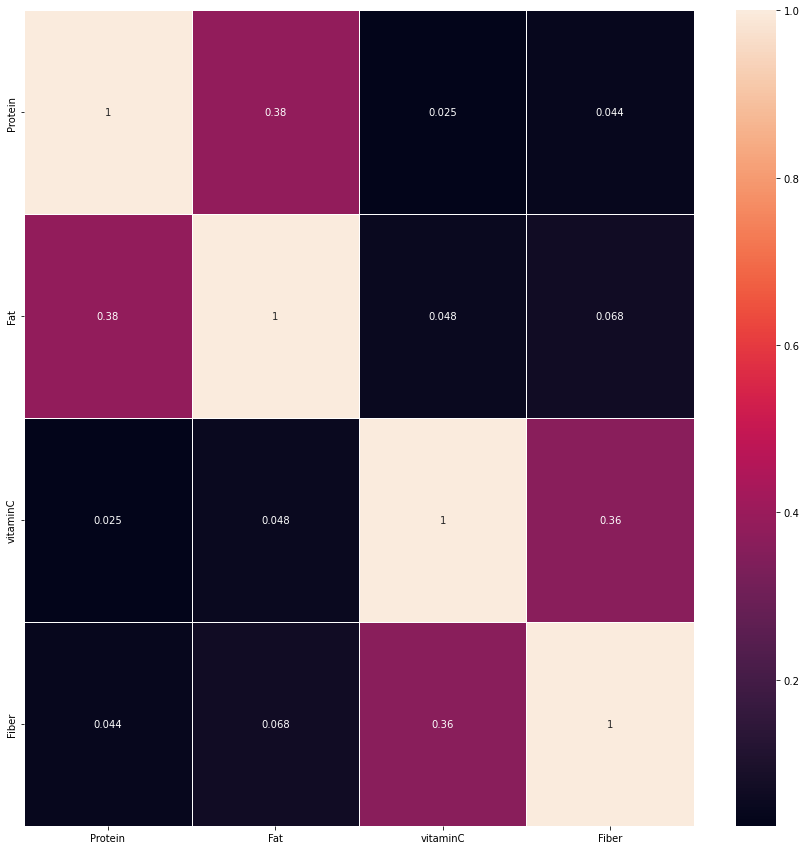

In [5]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(data=main_data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [6]:
# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [7]:
main_data.columns

Index(['Protein', 'Fat', 'vitaminC', 'Fiber', 'Product'], dtype='object')

Number of Clusters: 1 	Average Distortion: 1.858372044931876
Number of Clusters: 2 	Average Distortion: 1.6117782321793497
Number of Clusters: 3 	Average Distortion: 1.4339862138310062
Number of Clusters: 4 	Average Distortion: 1.360419683677697
Number of Clusters: 5 	Average Distortion: 1.2921087091071566
Number of Clusters: 6 	Average Distortion: 1.2308698407737135
Number of Clusters: 7 	Average Distortion: 1.181666783186867
Number of Clusters: 8 	Average Distortion: 1.1456751696295961


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

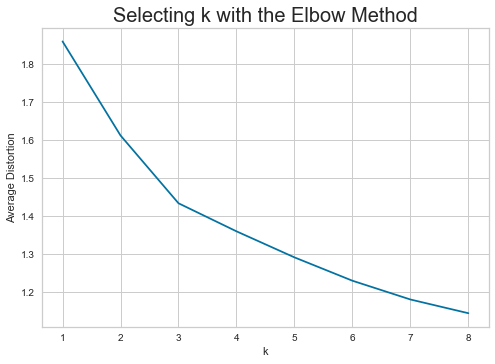

In [8]:
clusters = range(1, 9)
meanDistortions = []
subset_scaled_df = main_data[['Protein', 'Fat', 'vitaminC', 'Fiber']]
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

In [12]:
from sklearn.metrics import silhouette_score
scores = []
for k in range(3,8):
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    print(f"k={k}, score={silhouette_score(subset_scaled_df, prediction)}")


k=3, score=0.25318615552215973
k=4, score=0.20491939596006312
k=5, score=0.197450413336426
k=6, score=0.20725937798773242
k=7, score=0.20880440017467275


In [11]:
scores

[0.25318615552215973,
 0.20491939596006312,
 0.197450413336426,
 0.20725937798773242,
 0.20880440017467275]

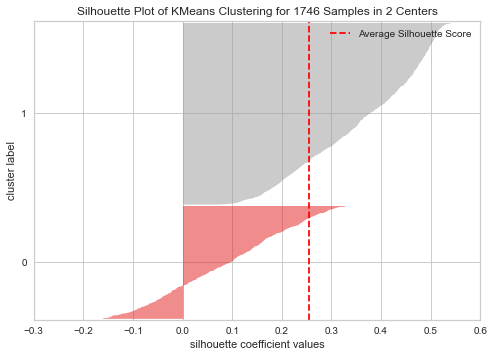

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1746 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [10]:
visualizer = SilhouetteVisualizer(model)
visualizer.fit(subset_scaled_df)
visualizer.show()

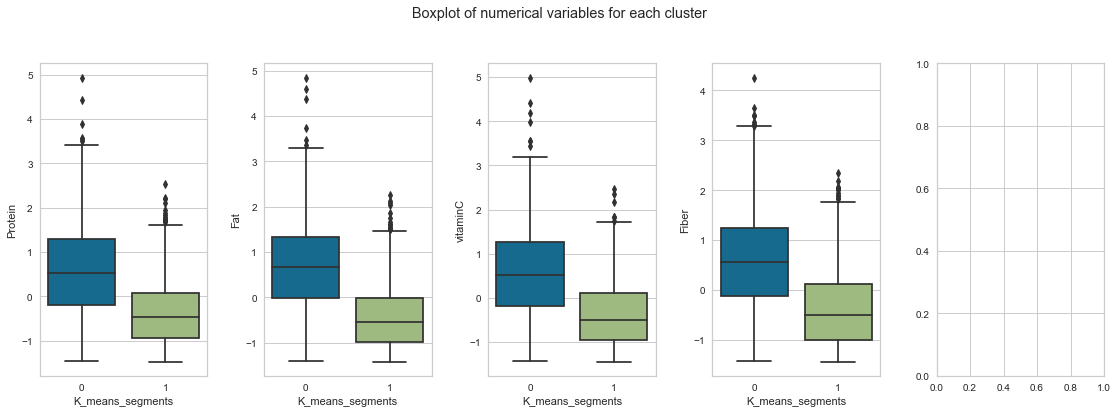

In [11]:
df["K_means_segments"] = model.labels_

fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(4):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [12]:
cluster_profile = df.groupby("K_means_segments").mean()
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Product"].count().values
)
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)


,Protein,Fat,vitaminC,Fiber,count_in_each_segment
K_means_segments,,,,,
0,0.587861,0.688420,0.602980,0.592034,669
1,-0.365162,-0.427626,-0.374553,-0.367754,1077


<AxesSubplot:xlabel='K_means_segments'>

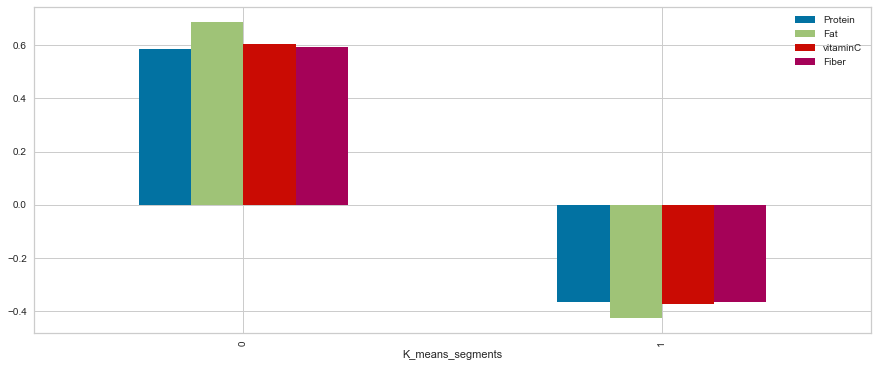

In [13]:
df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))
